In [1]:
!pip install qiskit[visualization]
!pip install qiskit-aer
from qiskit import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=355bbb61edb984c024843336f8ff04463549c1d399222fd5035ada4b380c93cb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc55

#Quantum Teleportation

Alice wants to send her state $|\psi⟩ = α|0\rangle + β|1⟩$ to Bob. Let's do a quick copy paste...
Oh no! We have the **no-cloning theorem** in quantum computing that prevents us from doing so.
As a result of this we can see that Alice can't simply generate a copy of $|𝜓⟩$ and give the copy to Bob. We can only copy classical states (not superpositions)
And that's why we use quantum teleportation!



1.   Alice and Bob share an entangled Bell pair between their two qubits.
2.   Next, Alice applies a series of operations between the qubits
3.   Alice measures both qubits and reports these to Bob
4.   Depending on Alice's communication, Bob applies according gates to his half of the bell pair
5.  Voila! The state $|\psi⟩$ has been teleported to Bob






---

First let's decide our qubit ordering.

$q_0$: The state $|\psi⟩ = α|0\rangle + β|1⟩$ that we want to teleport

$q_1$: Alice's half of the bell pair

$q_2$: Bob's half of the bell pair

So we start with$|q_0q_1q_2\rangle = |\Psi_1\rangle = |\psi\rangle \otimes |Φ^+\rangle$

$=(α|0\rangle_A + β|1⟩_A) \otimes \frac{1}{\sqrt{2}}(|0\rangle_A|0\rangle_B+|1\rangle_A|1\rangle_B)$

$=(α|0\rangle_A + β|1⟩_A) \otimes \frac{1}{\sqrt{2}}(|0\rangle_A|0\rangle_B+|1\rangle_A|1\rangle_B)$

$= \frac{1}{\sqrt{2}}(α|0⟩_A|0⟩_A|0⟩_B+α|0⟩_A|1⟩_A|1⟩_B+β|1⟩_A|0⟩_A|0⟩_B+β|1⟩_A|1⟩_A|1⟩_B)$

In [17]:
qc = QuantumCircuit(3,3)


###Step 1: create $|\Psi_1\rangle$
First let's create a state to teleport. In this circuit, let's teleport a simple |1>. You can use this circuit to teleport any desired state by encoding the desired state.

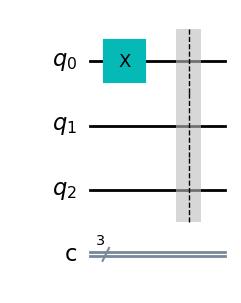

In [18]:
qc.x(0)
qc.barrier()
qc.draw('mpl')

Now, we create an entangled Bell pair $|Φ^+\rangle$ between Alice and Bob

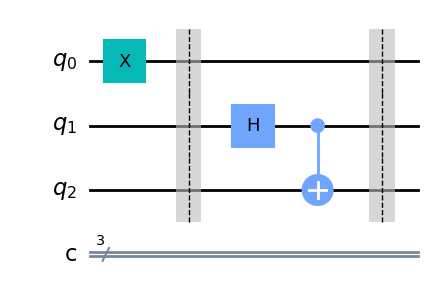

In [19]:
#Ex 1: Create |phi+> on qubits 1 and 2 [Hint: refer to how state |psi_1> works]

qc.h(1)
qc.cx(1,2)

qc.barrier()
qc.draw('mpl')

###Step 2: Alice applies series of operations
Alice applies the CNOT gate to her two qubits using the unknown qubit as the control and the qubit from the entangled pair as the target

$|\Psi_2\rangle= \frac{1}{\sqrt{2}}(α|0⟩_A|0⟩_A|0⟩_B+α|0⟩_A|1⟩_A|1⟩_B+β|1⟩_A|1⟩_A|0⟩_B+β|1⟩_A|0⟩_A|1⟩_B)$

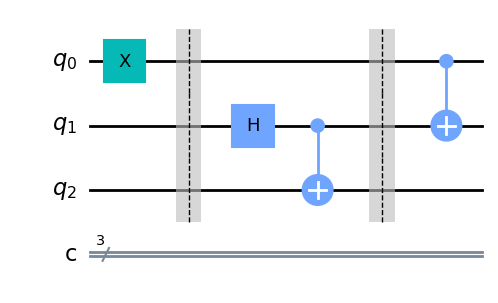

In [20]:
#Ex 2: Apply CX gate accordingly
qc.cx(0,1)
qc.draw('mpl')

Then, Alice applies the Hadamard gate to the qubit in the unknown state

$|\Psi_3\rangle= \frac{1}{\sqrt{2^3}}
(α|0⟩_A|0⟩_A|0⟩_B + α|1⟩_A|0⟩_A|0⟩_B + α|0⟩_A|1⟩_A|1⟩_B + α|1⟩_A|1⟩_A|1⟩_B+ β|0⟩_A|1⟩_A|0⟩_B - β|1⟩_A|1⟩_A|0⟩_B+β|0⟩_A|0⟩_A|1⟩_B - β|1⟩_A|0⟩_A|1⟩_B)$


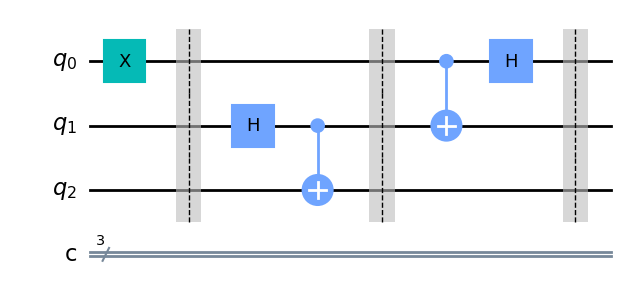

In [21]:
#Ex 3: Apply H gate accordingly
qc.h(0)

qc.barrier()
qc.draw('mpl')

###Step 3: Alice measures $q_0$ and $q_1$

Now, Alice measures her two qubits and communicates the two bits of classical information to Bob from the measurements. The system collapses to one of the four following states:

$A)\quad|\Psi_4\rangle= \frac{1}{\sqrt{2}}(α|0⟩_A|0⟩_A|0⟩_B + β|0⟩_A|0⟩_A|1⟩_B)$

$B)\quad|\Psi_4\rangle= \frac{1}{\sqrt{2}}(α|0⟩_A|1⟩_A|1⟩_B + β|0⟩_A|1⟩_A|0⟩_B)$

$C)\quad|\Psi_4\rangle= \frac{1}{\sqrt{2}}(α|1⟩_A|0⟩_A|0⟩_B - β|1⟩_A|0⟩_A|1⟩_B)$

$D)\quad|\Psi_4\rangle= \frac{1}{\sqrt{2}}(α|1⟩_A|1⟩_A|1⟩_B - β|1⟩_A|1⟩_A|0⟩_B)$




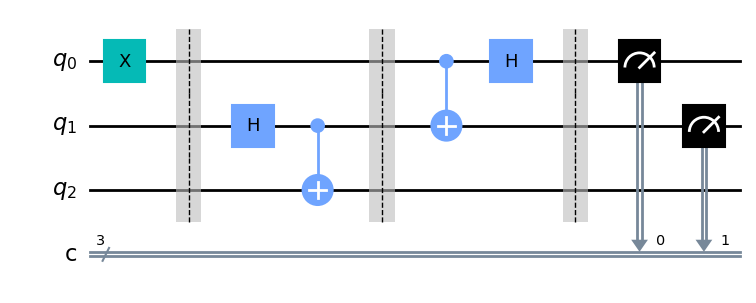

In [22]:
qc.measure([0,1],[0,1])

qc.draw('mpl')

###Step 4: Bob performs operations on his qubit
Depending on the values of the classical bits which Bob receives from Alice, he will apply one of four possible gates to his qubit

$A)\quad00:$ Bob does nothing (applies $I$), he has Alice's state $|\psi⟩$!
$\quad\quad\quad\quad|\Psi_5\rangle= I\frac{1}{\sqrt{2}}(α|0⟩_B + β|1⟩_B) = |\psi⟩$

$B)\quad01:$ Bob applies $X$

$\quad\quad\quad\quad|\Psi_5\rangle= X\frac{1}{\sqrt{2}}(α|1⟩_B + β|0⟩_B) = \frac{1}{\sqrt{2}}(α|0⟩_B + β|1⟩_B) = |\psi⟩$

$C)\quad10:$ Bob applies $X$

$\quad\quad\quad\quad|\Psi_5\rangle= Z\frac{1}{\sqrt{2}}(α|0⟩_B - β|1⟩_B) = \frac{1}{\sqrt{2}}(α|0⟩_B + β|1⟩_B) = |\psi⟩$

$D)\quad11:$ Bob applies $Z$

$\quad\quad\quad\quad|\Psi_5\rangle= ZX\frac{1}{\sqrt{2}}(α|1⟩_B - β|0⟩_B) = \frac{1}{\sqrt{2}}(α|0⟩_B + β|1⟩_B) = |\psi⟩$

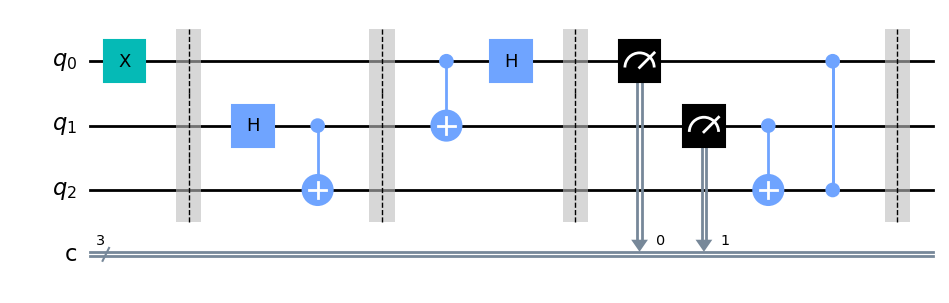

In [23]:
#Ex 4: Use controlled X and Z gates to perform teleportation

qc.cx(1,2)
qc.cz(0,2)
qc.barrier()

qc.draw('mpl')

###Step 5: Done! Measure Bob's qubit to find out what state it is in
Alice and Bob did it - they successfully teleported $|\psi⟩$!

In [24]:
qc.measure([2], [2])

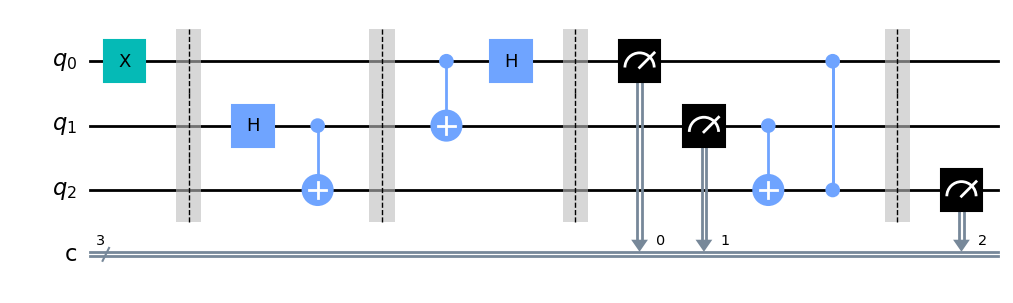

In [25]:
qc.draw('mpl')

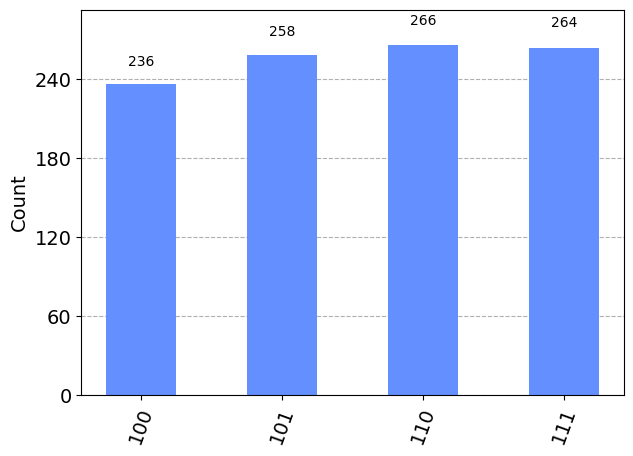

In [26]:
sim = Aer.get_backend('qasm_simulator')
from qiskit.visualization import plot_histogram
plot_histogram(sim.run(qc).result().get_counts())

The above results are ordered $c_2c_1c_0$, and we see that $c_2$ is always 1!

We have run this circuit on `qasm_simulator`, but you can run it on a real device to see similar results (with small errors)